In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/output/all_in_one.csv')

In [ ]:
from tabulate import tabulate

def visualize(df, small=False):
    print(f"Data Frame has {df.shape[0]} rows and {df.shape[1]} rows\n")
    print("These are the column names:")

    information = []
    counter = 0

    for column in df.columns:
        information.append([f"{counter}: {column}", f"{df[column].nunique()} unique values", f"{df[column].isna().sum()} are NaN", f"Type: {df[column].dtype}"])
        counter += 1

    print(tabulate(information, headers=['Column', 'Values', 'NaN', 'Type']))

    print("\n")

    if small == False:
      counter = 0
      for column in df.columns:
          print(f"{counter}: {column} has {df[column].nunique()} unique values. {df[column].isna().sum()} are NaN.")
          print(f"It's {df[column].dtype}. These are the unique values:")
          print(f"{df[column].unique()}\n")
          counter += 1

In [ ]:
df.shape

(13897047, 34)

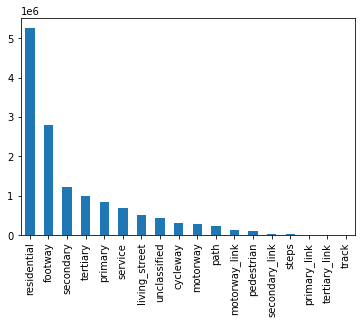

In [ ]:
df['osm_type'].value_counts().plot.bar()

In [ ]:
df.groupby('osm_type')['suitcase_id'].nunique()

osm_type
cycleway          27
footway           27
living_street     26
motorway          26
motorway_link     26
path              27
pedestrian        23
primary           27
primary_link      23
residential       27
secondary         27
secondary_link    26
service           26
steps             25
tertiary          27
tertiary_link     24
track             21
unclassified      27
Name: suitcase_id, dtype: int64

It looks like the osm type uses always from 21 to all(27) of the suitcase_id

In [ ]:
print_var1 = df['osm_id'].nunique()
print(f"There are {print_var1} different OSM")

print_var1 = df['edge_id'].nunique()
print(f"There are {print_var1} different Edge")

There are 6797 different OSM
There are 13745 different Edge


What does suitcase mean?

In [ ]:
df['suitcase_id'].unique()

array([ 86, 101,  70, 105, 111,  95, 102, 109,  63,  94,  78, 110,  92,
       104, 108,  79, 107, 112, 103,  75, 106,  74,  84, 116, 120, 118,
       121])

In [ ]:
visualize(df, small=True)

Data Frame has 13897047 rows and 34 rows

These are the column names:
Column                  Values                 NaN               Type
----------------------  ---------------------  ----------------  -------------
0: suitcase_id          27 unique values       0 are NaN         Type: int64
1: date_utc             3943831 unique values  0 are NaN         Type: object
2: lat                  259642 unique values   0 are NaN         Type: float64
3: lon                  260396 unique values   0 are NaN         Type: float64
4: edge_id              13745 unique values    0 are NaN         Type: object
5: osm_id               6797 unique values     0 are NaN         Type: int64
6: osm_type             18 unique values       0 are NaN         Type: object
7: 1                    178 unique values      12249775 are NaN  Type: float64
8: 2                    161 unique values      11059193 are NaN  Type: float64
9: 3                    177 unique values      13018129 are NaN  Type: float6

## EDA with DataFrame that contains only the rows with data

In [ ]:
columns = ''
for col in df.columns:
    columns += f"{col}, "
print(columns)

suitcase_id, date_utc, lat, lon, edge_id, osm_id, osm_type, 1, 2, 3, 4, 5, 7, 8, 14, 16, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 49, 61, 63, value.Vehicle_Mode, speed, 


In [ ]:
# Create DF whith the values that do have data in the numerical columns
numerical_columns = ['1', '2', '3', '4', '5', '7', '8', '14', '16', '25', '26', '27', '28', '29', '30', '31', '32', '33', '35', '36', '37', '39', '49', '61', '63']
df_small = df[~df[numerical_columns].isnull().all(axis=1)]
df_small = df_small.drop(['value.Vehicle_Mode', 'speed'], axis = 1)

In [46]:
len(numerical_columns)

25

In [ ]:
df_small.shape

(5453813, 32)

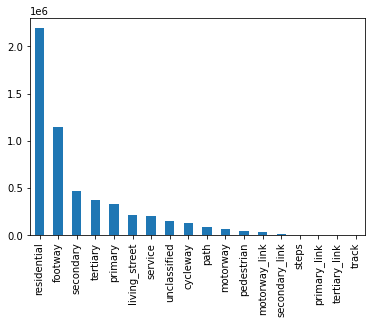

In [ ]:
df_small['osm_type'].value_counts().plot.bar()

In [ ]:
# df_small.iloc[9218]
# Some entries have more than one numerical column

## Data Frame with dirtiest entries (assuming numerical data means category of trash

In [ ]:
df_dirty = df_small.copy()
df_dirty['sum'] = df_dirty[numerical_columns].sum(axis=1)
df_dirty = df_dirty.drop(numerical_columns, axis = 1)

In [ ]:
df_dirty['sum'].unique()

array([  1.,   3.,   2.,   4.,   6.,   7.,   5.,  14.,  17.,   8.,   9.,
        13.,  10.,  11.,  19.,  25.,  44.,  16.,  12.,  26.,  21.,  35.,
        18.,  29.,  43.,  22.,  15.,  24.,  53.,  74.,  38.,  27.,  20.,
        46.,  40.,  33.,  45.,  28.,  31.,  30.,  51.,  73.,  48.,  32.,
        41.,  67.,  34.,  23.,  42.,  39.,  36.,  54.,  92.,  72.,  37.,
        49.,  70.,  61.,  66.,  58.,  64.,  71.,  62.,  52.,  57.,  60.,
        47.,  77.,  55.,  94.,  90.,  69.,  68.,  50.,  87.,  79.,  65.,
        63.,  78.,  56., 100., 160.,  96., 121., 127., 141., 130., 119.,
       117., 124., 126.,  89.,  93.,  85., 102.,  83., 136.,  59., 158.,
        97.,  76.,  98., 171.,  81.,  84., 198., 163., 233., 137., 253.,
       110., 111.,  75.,  80., 107., 114., 103.,  86.,  88., 123., 115.,
       112.,  82.,  95., 109.,  99., 108., 118., 106., 167., 132., 105.,
       148., 152., 153., 164., 139., 149., 133., 147., 146.,  91., 101.,
       142., 116., 135., 104., 113., 129., 176., 15

In [ ]:
df_dirty = df_dirty[df_dirty['sum'] >= 20]

In [ ]:
df_dirty.shape

(122047, 8)

In [ ]:
print(df_dirty.groupby('sum')['suitcase_id'].count())

sum
20.0     10529
21.0      9554
22.0      8401
23.0      7700
24.0      6992
         ...  
311.0        1
313.0        1
321.0        2
325.0        1
387.0        1
Name: suitcase_id, Length: 204, dtype: int64
